In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, auc
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.rcParams['font.weight'] = 'bold'
output = np.load("./label_random1.npz")
edge_list, prob, labels = output["edge_list"], output["pred"], output["labels"]
predict = np.where(prob > 0.5, 1, 0)

In [33]:
res=pd.DataFrame(metrics.classification_report(labels, predict, digits=4,output_dict=True)).T
res

,precision,recall,f1-score,support
0.0,0.813212,0.784615,0.798658,455.000000
1.0,0.791932,0.819780,0.805616,455.000000
accuracy,0.802198,0.802198,0.802198,0.802198
macro avg,0.802572,0.802198,0.802137,910.000000
weighted avg,0.802572,0.802198,0.802137,910.000000


In [34]:
acc = metrics.accuracy_score(labels, predict)
precision = metrics.precision_score(labels, predict, zero_division=1 )
recall = metrics.recall_score(labels, predict)
f1 = metrics.f1_score(labels, predict)
tn, fp, fn, tp = metrics.confusion_matrix(labels, predict).ravel()
ppv = tp/(tp+fp+1.4E-45)
npv = tn/(fn+tn+1.4E-45)
item={'baslineName':'Our','Accuracy':acc,'Precision':precision,'F1-Score':f1,'PPV':ppv,'NPV':npv,'RECALL':recall,'TP':tp,'FP':fp,'TN':tn,'FN':fn}
result=pd.DataFrame([item])
result

,baslineName,Accuracy,Precision,F1-Score,PPV,NPV,RECALL,TP,FP,TN,FN
0,Our,0.802198,0.791932,0.805616,0.791932,0.813212,0.81978,373,98,357,82


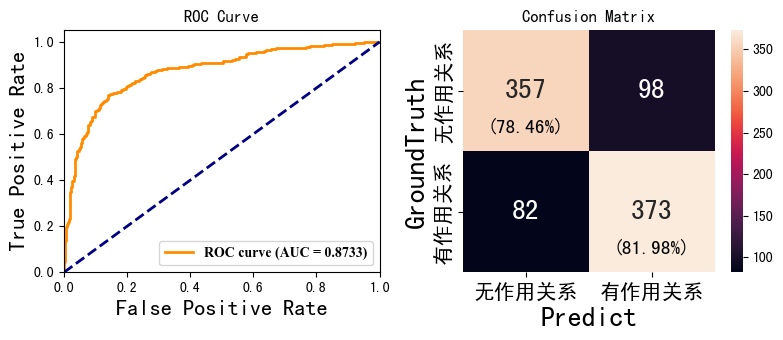

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import auc, roc_curve, confusion_matrix

target_names = ["无作用关系", "有作用关系"]
fpr, tpr, thresholds = roc_curve(labels, prob)
roc_auc = auc(fpr, tpr)

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5))

# 在第一个子图中绘制ROC曲线

axs[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate', size=16)
axs[0].set_ylabel('True Positive Rate', size=16)
axs[0].legend(prop={'family': 'Times New Roman', 'size': 10})
axs[0].set_title('ROC Curve')

# 计算混淆矩阵
cm = confusion_matrix(labels, predict)

# 计算每个类别的正确比例
correct_ratios = np.diag(cm) / cm.sum(axis=1)
# 在第二个子图中绘制混淆矩阵热图
sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names, annot_kws={"fontsize": 20}, ax=axs[1])
axs[1].set_xlabel('Predict', size=20)
axs[1].set_ylabel('GroundTruth', size=20)
axs[1].set_xticklabels(target_names, fontsize=15)
axs[1].set_yticklabels(target_names, fontsize=15)
axs[1].set_title('Confusion Matrix')

# 在混淆矩阵热图上标出每个类别的正确比例
for i, label in enumerate(target_names):
    axs[1].annotate(f"({correct_ratios[i]:.2%})", xy=(i+0.5, i+0.8), ha="center", va="center", fontsize=14, color="black")

plt.tight_layout()
plt.savefig("roc_confusion.png", dpi=300, bbox_inches='tight')
plt.show()


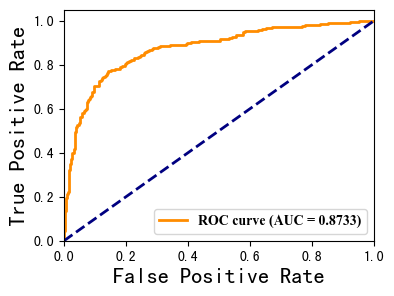

In [36]:
# 计算FPR和TPR
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(labels, prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=16)
plt.ylabel('True Positive Rate',size=16)
plt.legend(prop={'family': 'Times New Roman', 'size': 10})
plt.savefig("roc-1.png", dpi=300, bbox_inches = 'tight')
plt.show()

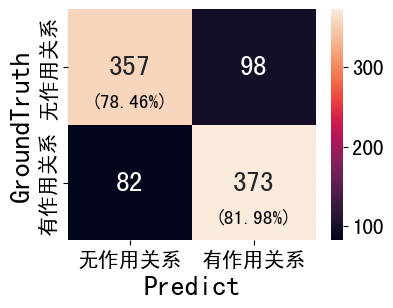

In [28]:
# 计算混淆矩阵
cm = confusion_matrix(labels, predict)

# 计算每个类别的正确比例
correct_ratios = np.diag(cm) / cm.sum(axis=1)
target_names = ["无作用关系","有作用关系"]
# 绘制混淆矩阵热图
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names, annot_kws={"fontsize":20})
ax.set_xlabel('Predict', size=20)
ax.set_ylabel('GroundTruth', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gcf().set_size_inches(4, 3)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

# 在热图上标出每个类别的正确比例
for i, label in enumerate(target_names):
    ax.annotate(f"({correct_ratios[i]:.2%})", xy=(i+0.5, i+0.8), ha="center", va="center", fontsize=14, color="black")

plt.show()